In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
 
set_matplotlib_formats ('png')

/tmp/ipykernel_6003/4294946217.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats ('png')


In [2]:
m_d = list (map (float, input().split())) # в мм
m_d

[4.71, 6.25, 12.75, 25.75, 38.33]

In [17]:
m_d = np.array (m_d)

In [3]:
m1 = [5 - i for i in range (5)]
m1

[5, 4, 3, 2, 1]

In [4]:
H = 1.4 # в м

In [5]:
lm = 532 # в нм

In [7]:
T5 = list (map (float, input().split())) # в мм
T5

[4.41, 8.33, 11.0]

In [30]:
T5 = np.array (T5)

In [8]:
m5 = [i + 3 for i in range(3)]
m5

[3, 4, 5]

In [9]:
D6 = list (map (float, input().split())) # в мм
D6

[3.28, 1.24, 0.98, 0.7]

In [68]:
D6 = np.array (D6)

In [10]:
m6 = [i + 2 for i in range(4)]
m6

[2, 3, 4, 5]

In [11]:
X7 = 65 # мм на 3 решетке

In [37]:
phi1 = m_d * 10 ** -3 / H
phi1

array([0.00336429, 0.00446429, 0.00910714, 0.01839286, 0.02737857])

In [104]:
s_phi1 = 0.1 * 10 ** -3 / H
s_phi1

7.142857142857143e-05

In [105]:
d1 = lm * 10 ** -3 / phi1 # в мкм
d1

array([158.13163482, 119.168     ,  58.41568627,  28.92427184,
        19.43125489])

In [106]:
s_d1 = s_phi1 / phi1 * d1
s_d1

array([3.35735955, 1.906688  , 0.45816225, 0.11232727, 0.05069464])

In [74]:
a2 = 25 
a1 = 110
b1 = 390
b2 = 1680 # в мм

In [84]:
s_x = 10

In [75]:
Г = b1 * b2 / (a1 * a2)
Г

238.25454545454545

In [86]:
s_Г = Г * np.sqrt ((s_x / a1) ** 2 + (s_x / b1) ** 2 + (s_x / b2) ** 2)
s_Г

22.54919844826215

In [76]:
d2 = T5[-1::-1] * 10 ** 3 / Г # в мкм
d2

array([46.16910867, 34.96260684, 18.50961538])

In [87]:
s_d2 = d2 * np.sqrt ((0.01 / T5[-1::-1]) ** 2 + (s_Г / Г) ** 2)
s_d2

array([4.36979877, 3.30924297, 1.75231397])

In [77]:
d3 = (lm * 10 ** -3) * 2 * (25 * 10 ** 3) / (D6[-1::-1] * 10 ** 3)
d3

array([38.        , 27.14285714, 21.4516129 ,  8.1097561 ])

In [88]:
s_d3 = d3 * 0.01 / D6[-1::-1]
s_d3

array([0.54285714, 0.27696793, 0.17299688, 0.02472487])

In [96]:
x1 = 1 / D6[-1::-1]
y1 = d1[:-1]
y1_err = s_d1[1:]

In [99]:
k1, s1 = np.polyfit (x1, y1, deg=1, cov=True)

/tmp/ipykernel_6003/2684946915.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar (x1, y1, yerr=y1_err, xerr=0.1, fmt='o-', ecolor='red', ls='none')


<Figure size 432x288 with 0 Axes>

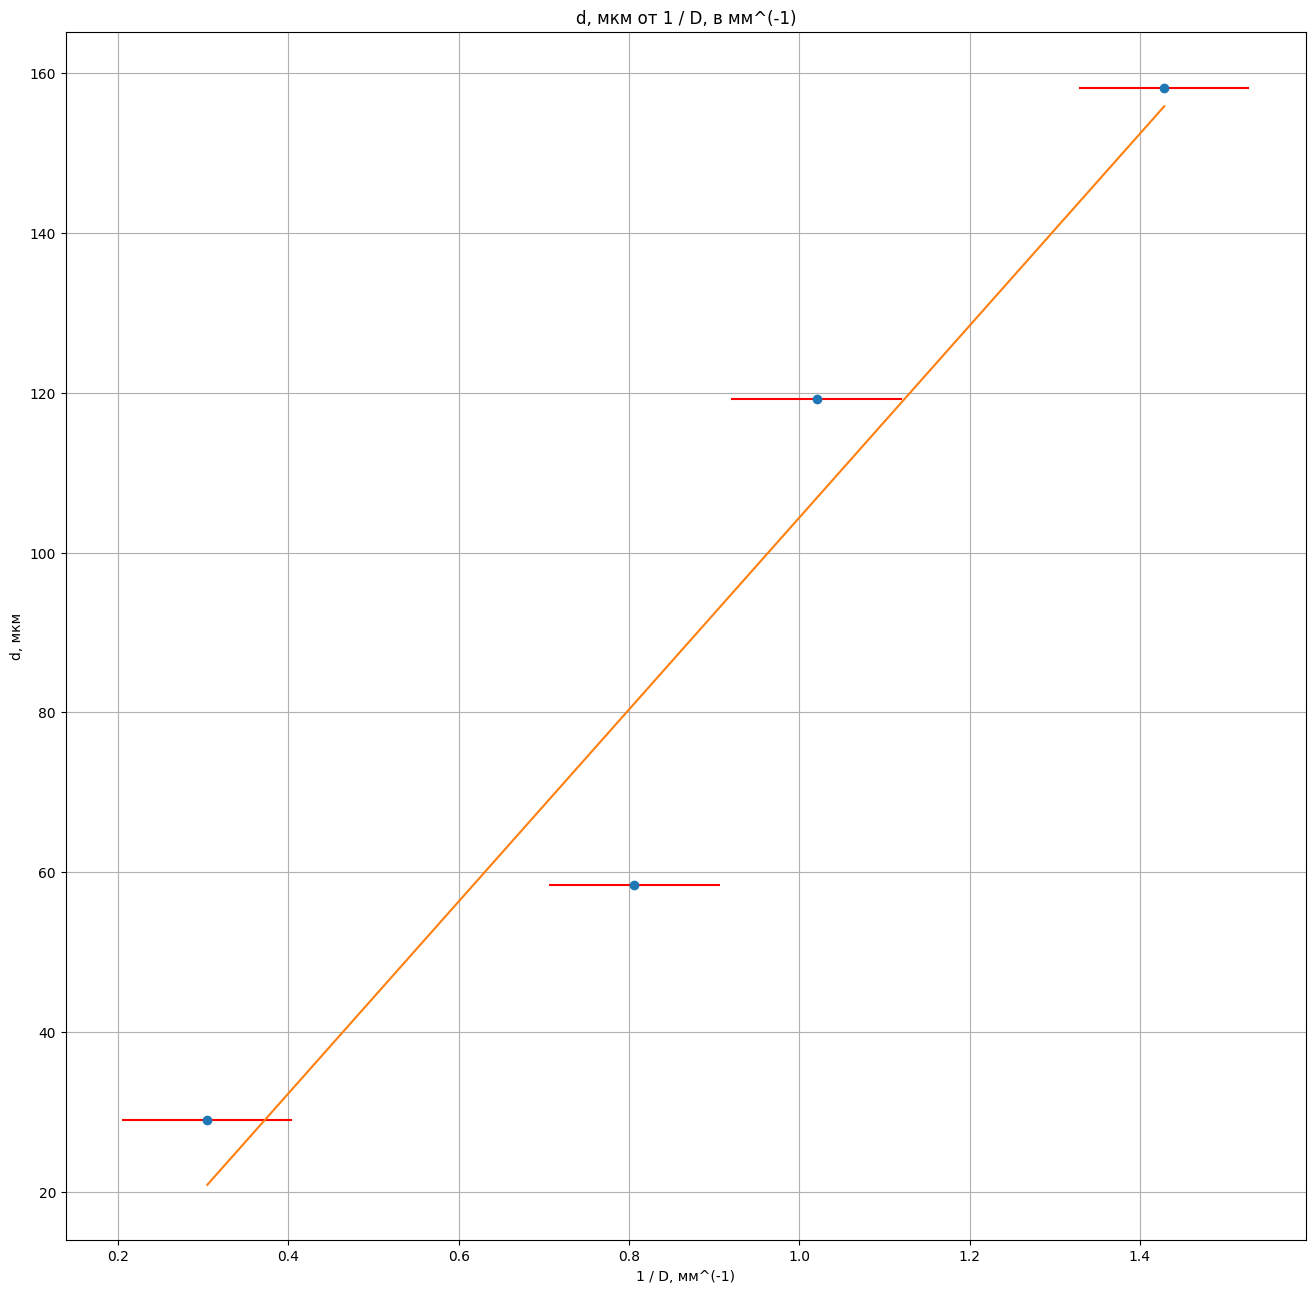

In [107]:
plt.figure()

fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

ax1.set_title ("d, мкм от 1 / D, в мм^(-1)")

ax1.set_ylabel ("d, мкм") 
ax1.set_xlabel ("1 / D, мм^(-1)")

# ax1.scatter (x1, y1, marker=".", s = 100)

plt.errorbar (x1, y1, yerr=y1_err, xerr=0.1, fmt='o-', ecolor='red', ls='none')

ax1.plot (x1, np.poly1d (k1)(x1))

plt.savefig("./picturies/graph1.png", dpi=100)
plt.grid()
plt.show()